# VARIABLE TRANSFORMATION 

* [1. Categorical Variable Encoding](#category)
    * [1.1 One Hot Encoding](#one)
    * [1.2 Integer Encoding](#integer)
    * [1.3 Count or Frequency Encoding](#count)
    * [1.4 Ordered Integer Encoding](#ordered)
    * [1.5 Mean Encoding](#mean)
    * [1.6 Probability Ratio Encoding](#probability)
    * [1.7 Weight of Evidence](#weight)
    * [1.8 Comparison Catergorical Encoding](#comparison)
    * [1.9 Engineering Rare Categories](#engineering)

have a chart of what each
The goal of catgorical encoding is:
- build predictive features from categories that can be use to train machine learning models

# 1.1 ONE HOT ENCODING<a class="anchor" id="one"></a>
One hot encoding, consists in encoding each categorical variable with different boolean variables (also called dummy variables) which take values 0 or 1, indicating if a category is present in an observation.

For example, for the categorical variable "Gender", with labels 'female' and 'male', we can generate the boolean variable "female", which takes 1 if the person is 'female' or 0 otherwise, or we can generate the variable "male", which takes 1 if the person is 'male' and 0 otherwise.

For the categorical variable "colour" with values 'red', 'blue' and 'green', we can create 3 new variables called "red", "blue" and "green". These variables will take the value 1, if the observation is of the said colour or 0 otherwise. 


### Encoding into k-1 dummy variables

Note however, that for the variable "colour", by creating 2 binary variables, say "red" and "blue", we already encode **ALL** the information:

- if the observation is red, it will be captured by the variable "red" (red = 1, blue = 0)
- if the observation is blue, it will be captured by the variable "blue" (red = 0, blue = 1)
- if the observation is green, it will be captured by the combination of "red" and "blue" (red = 0, blue = 0)

We do not need to add a third variable "green" to capture that the observation is green.

More generally, a categorical variable should be encoded by creating k-1 binary variables, where k is the number of distinct categories. In the case of gender, k=2 (male / female), therefore we need to create only 1 (k - 1 = 1) binary variable. In the case of colour, which has 3 different categories (k=3), we need to create 2 (k - 1 = 2) binary variables to capture all the information.

One hot encoding into k-1 binary variables takes into account that we can use 1 less dimension and still represent the whole information: if the observation is 0 in all the binary variables, then it must be 1 in the final (not present) binary variable.

**When one hot encoding categorical variables, we create k - 1 binary variables**


Most machine learning algorithms, consider the entire data set while being fit. Therefore, encoding categorical variables into k - 1 binary variables, is better, as it avoids introducing redundant information.


### Exception: One hot encoding into k dummy variables

There are a few occasions when it is better to encode variables into k dummy variables:

- when building tree based algorithms
- when doing feature selection by recursive algorithms
- when interested in determine the importance of each single category

Tree based algorithms, as opposed to the majority of machine learning algorithms, **do not** evaluate the entire dataset while being trained. They randomly extract a subset of features from the data set at each node for each tree. Therefore, if we want a tree based algorithm to consider **all** the categories, we need to encode categorical variables into **k binary variables**.

If we are planning to do feature selection by recursive elimination (or addition), or if we want to evaluate the importance of each single category of the categorical variable, then we will also need the entire set of binary variables (k) to let the machine learning model select which ones have the most predictive power.


### Advantages of one hot encoding

- Straightforward to implement
- Makes no assumption about the distribution or categories of the categorical variable
- Keeps all the information of the categorical variable
- Suitable for linear models

### Limitations

- Expands the feature space
- Does not add extra information while encoding
- Many dummy variables may be identical, introducing redundant information


In [ ]:
import pandas as pd

# to split the datasets
from sklearn.model_selection import train_test_split

# for one hot encoding with sklearn
from sklearn.preprocessing import OneHotEncoder

# for one hot encoding with feature-engine
from feature_engine.categorical_encoders import OneHotCategoricalEncoder

In [ ]:
# load titanic dataset

data = pd.read_csv('../titanic.csv',
                   usecols=['sex', 'embarked', 'cabin', 'survived'])
data.head()

In [ ]:
# let's capture only the first letter of the 
# cabin for this demonstration

data['cabin'] = data['cabin'].str[0]

data.head()

Just like imputation, all methods of categorical encoding should be performed over the training set, and then propagated to the test set. 

Why? 

Because these methods will "learn" patterns from the train data, and therefore you want to avoid leaking information and overfitting. But more importantly, because we don't know whether in future / live data, we will have all the categories present in the train data, or if there will be more or less categories. Therefore, we want to anticipate this uncertainty by setting the right processes right from the start. We want to create transformers that learn the categories from the train set, and used those learned categories to create the dummy variables in both train and test sets.

In [ ]:
# let's separate into training and testing set

X_train, X_test, y_train, y_test = train_test_split(
    data[['sex', 'embarked', 'cabin']],  # predictors
    data['survived'],  # target
    test_size=0.3,  # percentage of obs in test set
    random_state=0)  # seed to ensure reproducibility

X_train.shape, X_test.shape

In [ ]:
# sex has 2 labels

X_train['sex'].unique()

In [ ]:
# embarked has 3 labels and missing data

X_train['embarked'].unique()

In [ ]:
# cabin has 9 labels and missing data

X_train['cabin'].unique()

## One hot encoding with pandas

### Advantages

- quick
- returns pandas dataframe
- returns feature names for the dummy variables

### Limitations of pandas:

- it does not preserve information from train data to propagate to test data


-----

The pandas method get_dummies(), will create as many binary variables as categories in the variable:

If the variable colour has 3 categories in the train data, it will create 2 dummy variables. However, if the variable colour has 5 categories in the test data, it will create 4 binary variables, therefore train and test sets will end up with different number of features and will be incompatible with training and scoring using Scikit-learn.

In practice, we shouldn't be using get-dummies in our machine learning pipelines. It is however useful, for a quick data exploration. Let's look at this with examples.

### into k  dummy variables

In [ ]:
# we can create dummy variables with the build in
# pandas method get_dummies

tmp = pd.get_dummies(X_train['sex'])

tmp.head()

In [ ]:
# for better visualisation let's put the dummies next
# to the original variable

pd.concat([X_train['sex'],
           pd.get_dummies(X_train['sex'])], axis=1).head()

In [ ]:
# and now for all variables together: train set

tmp = pd.get_dummies(X_train)

print(tmp.shape)

tmp.head()

In [ ]:
# and now for all variables together: test set

tmp = pd.get_dummies(X_test)

print(tmp.shape)

tmp.head()

Notice the positives of pandas get_dummies:
- dataframe returned with feature names

**And the limitations:**

The train set contains 13 dummy features, whereas the test set contains 12 features. This occurred because there was no category T in cabin in the test set.

This will cause problems if training and scoring models with scikit-learn, because predictors require train and test sets to be of the same shape.

In [ ]:
# obtaining k-1 labels: we need to indicate get_dummies
# to drop the first binary variable

# altogether: train set

tmp = pd.get_dummies(X_train, drop_first=True)

print(tmp.shape)

tmp.head()

In [ ]:
# altogether: test set

tmp = pd.get_dummies(X_test, drop_first=True)

print(tmp.shape)

tmp.head()

In [ ]:
# we can add an additional dummy variable to indicate
# missing data

pd.get_dummies(X_train['embarked'], drop_first=True, dummy_na=True).head()

## One hot encoding with Scikit-learn

### Advantages

- quick
- Creates the same number of features in train and test set

### Limitations

- it returns a numpy array instead of a pandas dataframe
- it does not return the variable names, therefore inconvenient for variable exploration

In [ ]:
# we create and train the encoder

encoder = OneHotEncoder(categories='auto',
                       drop='first', # to return k-1, use drop=false to return k dummies
                       sparse=False,
                       handle_unknown='error') # helps deal with rare labels

encoder.fit(X_train.fillna('Missing'))

In [ ]:
# we observe the learned categories

encoder.categories_

In [ ]:
# transform the train set

tmp = encoder.transform(X_train.fillna('Missing'))

pd.DataFrame(tmp).head()

In [ ]:
# we can now retrieve the feature names as follows:

encoder.get_feature_names()

In [ ]:
# we can go ahead and transfom the test set
# and then reconstitute it back to a pandas dataframe
# and add the feature names derived by OHE

tmp = encoder.transform(X_test.fillna('Missing'))

tmp = pd.DataFrame(tmp)
tmp.columns = encoder.get_feature_names()

tmp.head()

## One hot encoding with Feature-Engine

### Advantages
- quick
- returns dataframe
- returns feature names
- allows to select features to encode

### Limitations
- Not sure yet.

In [ ]:
ohe_enc = OneHotCategoricalEncoder(
    top_categories=None,
    variables=['sex', 'embarked'], # we can select which variables to encode
    drop_last=True) # to return k-1, false to return k


ohe_enc.fit(X_train.fillna('Missing'))

In [ ]:
tmp = ohe_enc.transform(X_train.fillna('Missing'))

tmp.head()

Note how feature-engine returns the dummy variables with their names, and drops the original variable, leaving the dataset ready for further exploration or building machine learning models.

In [ ]:
tmp = ohe_enc.transform(X_test.fillna('Missing'))

tmp.head()

In [ ]:
# Feature-Engine's one hot encoder also selects
# all categorical variables automatically

ohe_enc = OneHotCategoricalEncoder(
    top_categories=None,
    drop_last=True) # to return k-1, false to return k


ohe_enc.fit(X_train.fillna('Missing'))

In [ ]:
ohe_enc.variables

In [ ]:
tmp = ohe_enc.transform(X_train.fillna('Missing'))

tmp.head()

In [ ]:
tmp = ohe_enc.transform(X_test.fillna('Missing'))

tmp.head()

Note how this encoder returns a variable cabin_T for the test set as well, even though this category is not present in the test set. This allows the integration with Scikit-learn pipeline and scoring of test set by the built algorithm..


# ----------

# 1.2 INTEGER ENCODING<a class="anchor" id="INTEGER"></a>

Integer encoding consist in replacing the categories by digits from 1 to n (or 0 to n-1, depending the implementation), where n is the number of distinct categories of the variable.

The numbers are assigned arbitrarily. This encoding method allows for quick benchmarking of machine learning models. 


### Advantages

- Straightforward to implement
- Does not expand the feature space


### Limitations

- Does not capture any information about the categories labels
- Not suitable for linear models.

Integer encoding is better suited for non-linear methods which are able to navigate through the arbitrarily assigned digits to try and find patters that relate them to the target.


In [ ]:
import numpy as np
import pandas as pd

# to split the datasets
from sklearn.model_selection import train_test_split

# for integer encoding using sklearn
from sklearn.preprocessing import LabelEncoder

# for integer encoding using feature-engine
from feature_engine.categorical_encoders import OrdinalCategoricalEncoder

In [ ]:
# load dataset

data = pd.read_csv(
    '../houseprice.csv',
    usecols=['Neighborhood', 'Exterior1st', 'Exterior2nd', 'SalePrice'])

data.head()

In [ ]:
# let's have a look at how many labels each variable has

for col in data.columns:
    print(col, ': ', len(data[col].unique()), ' labels')

In [ ]:
# let's explore the unique categories
data['Neighborhood'].unique()

In [ ]:
# let's separate into training and testing set

X_train, X_test, y_train, y_test = train_test_split(
    data[['Neighborhood', 'Exterior1st', 'Exterior2nd']], # predictors
    data['SalePrice'],  # target
    test_size=0.3,  # percentage of obs in test set
    random_state=0)  # seed to ensure reproducibility

X_train.shape, X_test.shape

## Integer encoding with pandas


### Advantages

- quick
- returns pandas dataframe

### Limitations of pandas:

- it does not preserve information from train data to propagate to test data

We need to capture and save the mappings one by one, manually, if we are planing to use those in production.

In [ ]:
# we can turn the previous commands into 2 functions


def find_category_mappings(df, variable):
    return {k: i for i, k in enumerate(df[variable].unique(), 0)}


def integer_encode(train, test, variable, ordinal_mapping):

    X_train[variable] = X_train[variable].map(ordinal_mapping)
    X_test[variable] = X_test[variable].map(ordinal_mapping)

The dictionary indicates which number will replace each category. Numbers were assigned arbitrarily from 0 to n - 1 where n is the number of distinct categories.

In [ ]:
# let's explore the result

X_train['Neighborhood'].head(10)

In [ ]:
# and now we run a loop over the remaining categorical variables

for variable in ['Exterior1st', 'Exterior2nd']:
    mappings = find_category_mappings(X_train, variable)
    integer_encode(X_train, X_test, variable, mappings)

## Integer Encoding with Scikit-learn

In [ ]:
# additional import required

from collections import defaultdict

In [ ]:
# let's separate into training and testing set

X_train, X_test, y_train, y_test = train_test_split(
    data[['Neighborhood', 'Exterior1st', 'Exterior2nd']], # predictors
    data['SalePrice'],  # target
    test_size=0.3,  # percentage of obs in test set
    random_state=0)  # seed to ensure reproducibility

X_train.shape, X_test.shape

In [ ]:
d = defaultdict(LabelEncoder)

In [ ]:
# Encoding the variable
train_transformed = X_train.apply(lambda x: d[x.name].fit_transform(x))

# # Using the dictionary to encode future data
test_transformed = X_test.apply(lambda x: d[x.name].transform(x))

In [ ]:
train_transformed.head()

In [ ]:
test_transformed.head()

In [ ]:
# and to inverse transform to recover the original labels

# # Inverse the encoded
tmp = train_transformed.apply(lambda x: d[x.name].inverse_transform(x))
tmp.head()

## Integer Encoding with Feature-Engine

In [ ]:
# let's separate into training and testing set

X_train, X_test, y_train, y_test = train_test_split(
    data[['Neighborhood', 'Exterior1st', 'Exterior2nd']], # predictors
    data['SalePrice'],  # target
    test_size=0.3,  # percentage of obs in test set
    random_state=0)  # seed to ensure reproducibility

X_train.shape, X_test.shape

In [ ]:
ordinal_enc = OrdinalCategoricalEncoder(
    encoding_method='arbitrary',
    variables=['Neighborhood', 'Exterior1st', 'Exterior2nd'])

ordinal_enc.fit(X_train)

In [ ]:
# in the encoder dict we can observe the numbers
# assigned to each category for all the indicated variables

ordinal_enc.encoder_dict_

In [ ]:
# this is the list of variables that the encoder will transform

ordinal_enc.variables

In [ ]:
X_train = ordinal_enc.transform(X_train)
X_test = ordinal_enc.transform(X_test)

# let's explore the result
X_train.head()

**Note**

If the argument variables is left to None, then the encoder will automatically identify all categorical variables. Is that not sweet?

The encoder will not encode numerical variables. So if some of your numerical variables are in fact categories, you will need to re-cast them as object before using the encoder.

Note, if there is a variable in the test set, for which the encoder doesn't have a number to assigned (the category was not seen in the train set), the encoder will return an error.

# ----------

# 1.3 COUNT OR FRQUENCY ENCODING<a class="anchor" id="count"></a>

In count encoding we replace the categories by the count of the observations that show that category in the dataset. Similarly, we can replace the category by the frequency -or percentage- of observations in the dataset. That is, if 10 of our 100 observations show the colour blue, we would replace blue by 10 if doing count encoding, or by 0.1 if replacing by the frequency. These techniques capture the representation of each label in a dataset, but the encoding may not necessarily be predictive of the outcome. These are however, very popular encoding methods in Kaggle competitions.

The assumption of this technique is that the number observations shown by each variable is somewhat informative of the predictive power of the category.


### Advantages

- Simple
- Does not expand the feature space

### Disadvantages

- If 2 different categories appear the same amount of times in the dataset, that is, they appear in the same number of observations, they will be replaced by the same number: may lose valuable information.

For example, if there are 10 observations for the category blue and 10 observations for the category red, both will be replaced by 10, and therefore, after the encoding, will appear to be the same thing. 

When doing count transformation of categorical variables, it is important to calculate the count (or frequency = count / total observations) **over the training set**, and then use those numbers to replace the labels in the test set.

In [ ]:
import numpy as np
import pandas as pd

# to split the datasets
from sklearn.model_selection import train_test_split

# to encode with feature-engine
from feature_engine.categorical_encoders import CountFrequencyCategoricalEncoder

In [ ]:
# load dataset

data = pd.read_csv(
    '../houseprice.csv',
    usecols=['Neighborhood', 'Exterior1st', 'Exterior2nd', 'SalePrice'])

data.head()

In [ ]:
# let's have a look at how many labels each variable has

for col in data.columns:
    print(col, ': ', len(data[col].unique()), ' labels')

In [ ]:
# let's separate into training and testing set

X_train, X_test, y_train, y_test = train_test_split(
    data[['Neighborhood', 'Exterior1st', 'Exterior2nd']], # predictors
    data['SalePrice'],  # target
    test_size=0.3,  # percentage of obs in test set
    random_state=0)  # seed to ensure reproducibility

X_train.shape, X_test.shape

## Count and Frequency encoding with pandas

In [ ]:
# let's obtain the counts for each one of the labels
# in the variable Neigbourhood

count_map = X_train['Neighborhood'].value_counts().to_dict()

count_map

In [ ]:
# replace the labels with the counts

X_train['Neighborhood'] = X_train['Neighborhood'].map(count_map)
X_test['Neighborhood'] = X_test['Neighborhood'].map(count_map)

In [ ]:
# let's explore the result

X_train['Neighborhood'].head(10)

In [ ]:
# if instead of the count we would like the frequency
# we need only divide the count by the total number of observations:

frequency_map = (X_train['Exterior1st'].value_counts() / len(X_train) ).to_dict()
frequency_map

In [ ]:
# replace the labels with the frequencies

X_train['Exterior1st'] = X_train['Exterior1st'].map(frequency_map)
X_test['Exterior1st'] = X_test['Exterior1st'].map(frequency_map)

## Count or Frequency Encoding with Feature-Engine

In [ ]:
# let's separate into training and testing set

X_train, X_test, y_train, y_test = train_test_split(
    data[['Neighborhood', 'Exterior1st', 'Exterior2nd']], # predictors
    data['SalePrice'],  # target
    test_size=0.3,  # percentage of obs in test set
    random_state=0)  # seed to ensure reproducibility

X_train.shape, X_test.shape

In [ ]:
count_enc = CountFrequencyCategoricalEncoder(
    encoding_method='count', # to do frequency ==> encoding_method='frequency'
    variables=['Neighborhood', 'Exterior1st', 'Exterior2nd'])

count_enc.fit(X_train)

In [ ]:
# in the encoder dict we can observe the number of 
# observations per category for each variable

count_enc.encoder_dict_

In [ ]:
X_train = count_enc.transform(X_train)
X_test = count_enc.transform(X_test)

# let's explore the result
X_train.head()

If the argument variables is left to None, then the encoder will automatically identify all categorical variables. Is that not sweet?

The encoder will not encode numerical variables. So if some of your numerical variables are in fact categories, you will need to re-cast them as object before using the encoder.

Note, if there is a variable in the test set, for which the encoder doesn't have a number to assigned (the category was not seen in the train set), the encoder will return an error.

target encoding
In the previous lectures in this section, we learned how to convert a label into a number, by using one hot encoding, replacing by a digit or replacing by frequency or counts of observations. These methods are simple, make (almost) no assumptions and work generally well in different scenarios.

There are however methods that allow us to capture information while pre-processing the labels of categorical variables. These methods include:

- Ordering the labels according to the target
- Replacing labels by the target mean (mean encoding / target encoding)
- Replacing the labels by the probability ratio of the target being 1 or 0
- Weight of evidence.

All of the above methods have something in common:

- the encoding is **guided by the target**, and
- they create a **monotonic relationship** between the variable and the target.


### Monotonicity

A monotonic relationship is a relationship that does one of the following:

- (1) as the value of one variable increases, so does the value of the other variable; or
- (2) as the value of one variable increases, the value of the other variable decreases.

In this case, as the value of the independent variable (predictor) increases, so does the target, or conversely, as the value of the variable increases, the target value decreases.



### Advantages of target guided encodings

- Capture information within the category, therefore creating more predictive features
- Create a monotonic relationship between the variable and the target, therefore suitable for linear models
- Do not expand the feature space


### Limitations

- Prone to cause over-fitting
- Difficult to cross-validate with current libraries


### Note

The methods discussed in this and the coming 3 lectures can be also used on numerical variables, after discretisation. This creates a monotonic relationship between the numerical variable and the target, and therefore improves the performance of linear models. I will discuss this in more detail in the section "Discretisation".

===============================================================================



# 1.4 ORDERED INTEGER ENCODING<a class="anchor" id="ordered"></a>

Ordering the categories according to the target means assigning a number to the category from 1 to k, where k is the number of distinct categories in the variable, but this numbering is informed by the mean of the target for each category.

For example, we have the variable city with values London, Manchester and Bristol; if the default rate is 30% in London, 20% in Bristol and 10% in Manchester, then we replace London by 1, Bristol by 2 and Manchester by 3.


In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

# to split the datasets
from sklearn.model_selection import train_test_split

# for encoding with feature-engine
from feature_engine.categorical_encoders import OrdinalCategoricalEncoder

In [ ]:
# load dataset

data = pd.read_csv(
    '../houseprice.csv',
    usecols=['Neighborhood', 'Exterior1st', 'Exterior2nd', 'SalePrice'])

data.head()

In [ ]:
# let's have a look at how many labels each variable has

for col in data.columns:
    print(col, ': ', len(data[col].unique()), ' labels')

In [ ]:
# let's explore the unique categories
data['Neighborhood'].unique()

### Encoding important

We select which digit to assign each category using the train set, and then use those mappings in the test set.

**Note that to do this technique with pandas, we need to keep the target within the training set**

In [ ]:
# let's separate into training and testing set

X_train, X_test, y_train, y_test = train_test_split(
    data[['Neighborhood', 'Exterior1st', 'Exterior2nd', 'SalePrice']],  # this time we keep the target!!
    data['SalePrice'],  # target
    test_size=0.3,  # percentage of obs in test set
    random_state=0)  # seed to ensure reproducibility

X_train.shape, X_test.shape

In [ ]:
# let's explore the relationship of the categories with the target

for var in ['Neighborhood', 'Exterior1st', 'Exterior2nd']:
    
    fig = plt.figure()
    fig = X_train.groupby([var])['SalePrice'].mean().plot()
    fig.set_title('Relationship between {} and SalePrice'.format(var))
    fig.set_ylabel('Mean SalePrice')
    plt.show()

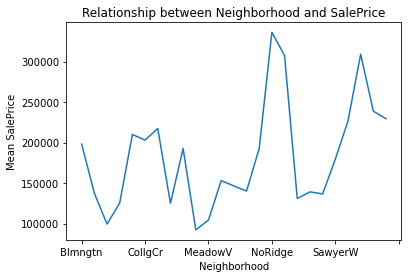

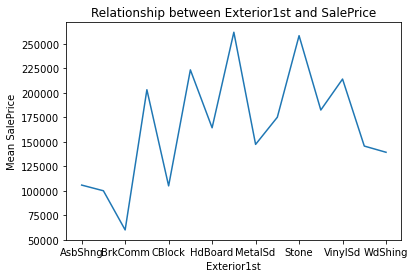

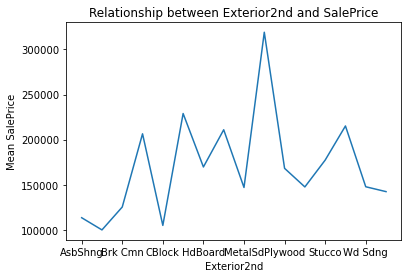

You can see that the relationship between the target and the categories of the categorical variables goes up and down, depending on the category.


## Ordered Integer encoding with pandas


### Advantages

- quick
- returns pandas dataframe

### Limitations of pandas:

- it does not preserve information from train data to propagate to test data

We need to store the encoding maps separately if planing to use them in production.

In [ ]:
# let's order the labels according to the mean target value

X_train.groupby(['Neighborhood'])['SalePrice'].mean().sort_values()

In the above cell, we ordered the categories from the neighbourhood where the houses sale prices are cheaper (IDOTRR), to the neighbourhood where the house prices are, on average, more expensive (NoRidge).

In the next cells, we will replace those categories, ordered as they are, by the numbers 0 to k, where k is the number of different categories minus 1, in this case 25 - 1 = 24.

So IDOTRR will be replaced by 0 and NoRidge by 24, just to be clear.

In [ ]:
# first  we generate an ordered list with the labels

ordered_labels = X_train.groupby(['Neighborhood'
                                  ])['SalePrice'].mean().sort_values().index

ordered_labels

In [ ]:
# next let's create a dictionary with the mappings of categories to numbers

ordinal_mapping = {k: i for i, k in enumerate(ordered_labels, 0)}

ordinal_mapping

In [ ]:
# now, we replace the labels with the integers

X_train['Neighborhood'] = X_train['Neighborhood'].map(ordinal_mapping)
X_test['Neighborhood'] = X_test['Neighborhood'].map(ordinal_mapping)

In [ ]:
# let's explore the result

X_train['Neighborhood'].head(10)

In [ ]:
# we can turn the previous commands into 2 functions


def find_category_mappings(df, variable, target):

    # first  we generate an ordered list with the labels
    ordered_labels = X_train.groupby([variable
                                      ])[target].mean().sort_values().index

    # return the dictionary with mappings
    return {k: i for i, k in enumerate(ordered_labels, 0)}


def integer_encode(train, test, variable, ordinal_mapping):

    X_train[variable] = X_train[variable].map(ordinal_mapping)
    X_test[variable] = X_test[variable].map(ordinal_mapping)

In [ ]:
# and now we run a loop over the remaining categorical variables

for variable in ['Exterior1st', 'Exterior2nd']:

    mappings = find_category_mappings(X_train, variable, 'SalePrice')

    integer_encode(X_train, X_test, variable, mappings)

In [ ]:
# let's see the result

X_train.head()

In [ ]:
# let's inspect the newly created monotonic relationship
# between the variables and the target

for var in ['Neighborhood', 'Exterior1st', 'Exterior2nd']:
    
    fig = plt.figure()
    fig = X_train.groupby([var])['SalePrice'].mean().plot()
    fig.set_title('Monotonic relationship between {} and SalePrice'.format(var))
    fig.set_ylabel('Mean SalePrice')
    plt.show()

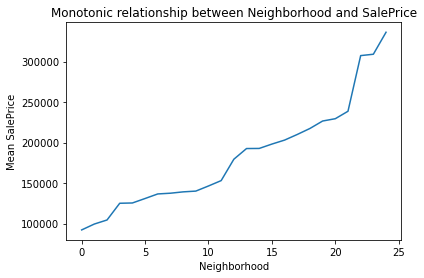

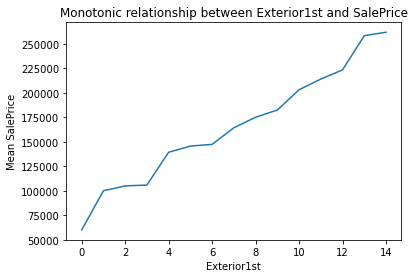

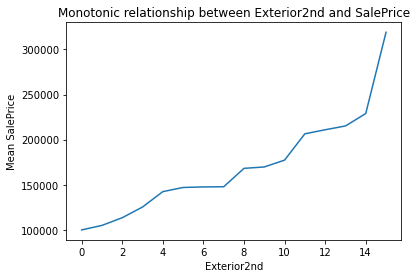

We see from the plots above that the relationship between the categories and the target is now monotonic, and for the first 2 variables, almost linear, which helps improve linear models performance.

### Note

Monotonic does not mean strictly linear. Monotonic means that it increases constantly, or it decreases constantly.

Replacing categorical labels with this code and method will generate missing values for categories present in the test set that were not seen in the training set. Therefore it is extremely important to handle rare labels before-hand. I will explain how to do this, in a later notebook.

## Integer Encoding with Feature-Engine

If using Feature-Engine, instead of pandas, we do not need to keep the target variable in the training dataset.

In [ ]:
# let's separate into training and testing set

X_train, X_test, y_train, y_test = train_test_split(
    data[['Neighborhood', 'Exterior1st', 'Exterior2nd']], # predictors
    data['SalePrice'],  # target
    test_size=0.3,  # percentage of obs in test set
    random_state=0)  # seed to ensure reproducibility

X_train.shape, X_test.shape

In [ ]:
ordinal_enc = OrdinalCategoricalEncoder(
    # NOTE that we indicate ordered in the encoding_method, otherwise it assings numbers arbitrarily
    encoding_method='ordered',
    variables=['Neighborhood', 'Exterior1st', 'Exterior2nd'])

In [ ]:
# when fitting the transformer, we need to pass the target as well
# just like with any Scikit-learn predictor class

ordinal_enc.fit(X_train, y_train)

In [ ]:
# in the encoder dict we can observe each of the top categories
# selected for each of the variables

ordinal_enc.encoder_dict_

In [ ]:
# this is the list of variables that the encoder will transform

ordinal_enc.variables

In [ ]:
X_train = ordinal_enc.transform(X_train)
X_test = ordinal_enc.transform(X_test)

# let's explore the result
X_train.head()

**Note**

If the argument variables is left to None, then the encoder will automatically identify all categorical variables. Is that not sweet?

The encoder will not encode numerical variables. So if some of your numerical variables are in fact categories, you will need to re-cast them as object before using the encoder.

Finally, if there is a label in the test set that was not present in the train set, the encoder will through and error, to alert you of this behaviour.

## 1.5 MEAN ENCODING OR TARGET ENCODING<a class="anchor" id="mean"></a>

Mean encoding implies replacing the category by the average target value for that category. For example, if we have the variable city, with categories London, Manchester and Bristol, and we want to predict the default rate, if the default rate for London is 30% we replace London by 0.3, if the default rate for Manchester is 20% we replace Manchester by 0.2 and so on.

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

# to split the datasets
from sklearn.model_selection import train_test_split

# for encoding with feature-engine
from feature_engine.categorical_encoders import MeanCategoricalEncoder

In [ ]:
# load dataset

data = pd.read_csv(
    '../titanic.csv',
    usecols=['cabin', 'sex', 'embarked', 'survived'])

data.head()

In [ ]:
# let's fill na in embarked

data['embarked'].fillna('Missing', inplace=True)

In [ ]:
# Now we extract the first letter of the cabin
# to create a simpler variable for the demo

data['cabin'] = data['cabin'].astype(str).str[0]

In [ ]:
# let's have a look at how many labels each variable has

for col in data.columns:
    print(col, ': ', len(data[col].unique()), ' labels')

In [ ]:
# let's explore the unique categories

data['cabin'].unique()

We calculate the target mean per category using the train set, and then use those mappings in the test set.

Note that for the pandas implementation we need to keep the target in the training set:

In [ ]:
# let's separate into training and testing set

X_train, X_test, y_train, y_test = train_test_split(
    data[['cabin', 'sex', 'embarked', 'survived']],  # this time we keep the target!!
    data['survived'],  # target
    test_size=0.3,  # percentage of obs in test set
    random_state=0)  # seed to ensure reproducibility

X_train.shape, X_test.shape

In [ ]:
# let's explore the relationship of the categories with the target

for var in ['cabin', 'sex', 'embarked']:
    
    fig = plt.figure()
    fig = X_train.groupby([var])['survived'].mean().plot()
    fig.set_title('Relationship between {} and Survival'.format(var))
    fig.set_ylabel('Mean Survival')
    plt.show()

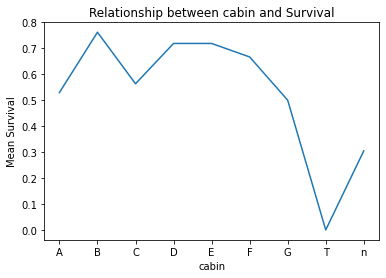

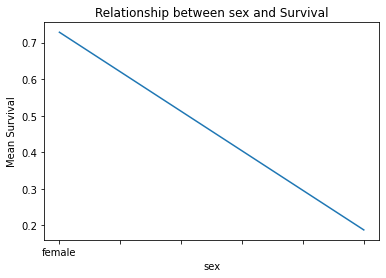

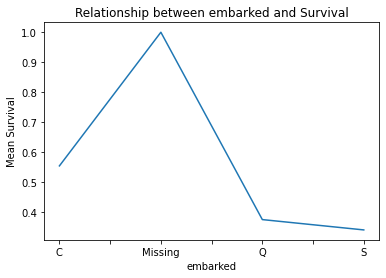

You can see that the relationship between the target and cabin and embarked goes up and down, depending on the category.


## Mean encoding with pandas


### Advantages

- quick
- returns pandas dataframe

### Limitations of pandas:

- it does not preserve information from train data to propagate to test data

We need to store the mappings separately if planning to use the model in production.

In [ ]:
# let's calculate the mean target value per category for cabin

X_train.groupby(['cabin'])['survived'].mean()

In [ ]:
# and now let's do the same but capturing the result in a dictionary

ordered_labels = X_train.groupby(['cabin'])['survived'].mean().to_dict()

ordered_labels

In [ ]:
# now, we replace the labels with the target means

X_train['cabin'] = X_train['cabin'].map(ordered_labels)
X_test['cabin'] = X_test['cabin'].map(ordered_labels)

In [ ]:
# let's explore the result

X_train['cabin'].head(10)

In [ ]:
# we can turn the previous commands into 2 functions


def find_category_mappings(df, variable, target):
    return df.groupby([variable])[target].mean().to_dict()


def integer_encode(train, test, variable, ordinal_mapping):

    X_train[variable] = X_train[variable].map(ordinal_mapping)
    X_test[variable] = X_test[variable].map(ordinal_mapping)

In [ ]:
# and now we run a loop over the remaining categorical variables

for variable in ['sex', 'embarked']:
    mappings = find_category_mappings(X_train, variable, 'survived')
    integer_encode(X_train, X_test, variable, mappings)

In [ ]:
# let's see the result

X_train.head()

In [ ]:
# let's inspect the newly created monotonic relationship
# between the variables and the target

for var in ['cabin', 'sex', 'embarked']:
    
    fig = plt.figure()
    fig = X_train.groupby([var])['survived'].mean().plot()
    fig.set_title('Monotonic relationship between {} and Survival'.format(var))
    fig.set_ylabel('Mean Survived')
    plt.show()

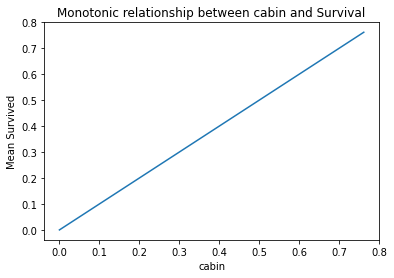

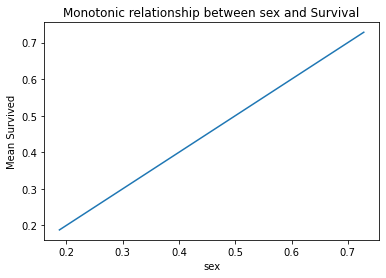

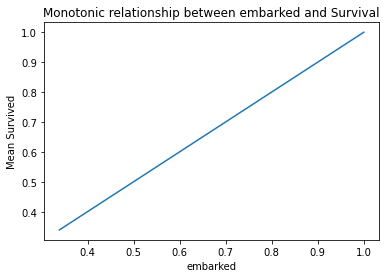

Mean Encoding creates linear relationships between the mean target and the categories.

### Note

Replacing categorical labels with this code and method will generate missing values for categories present in the test set that were not seen in the training set. Therefore it is extremely important to handle rare labels before-hand. I will explain how to do this, in a later notebook.

## Mean Encoding with Feature-Engine

If using Feature-Engine, instead of pandas, we do not need to keep the target variable in the training dataset.

In [ ]:
# let's separate into training and testing set

X_train, X_test, y_train, y_test = train_test_split(
    data[['cabin', 'sex', 'embarked']],  # predictors
    data['survived'],  # target
    test_size=0.3,  # percentage of obs in test set
    random_state=0)  # seed to ensure reproducibility

X_train.shape, X_test.shape

In [ ]:
mean_enc = MeanCategoricalEncoder(
    variables=['cabin', 'sex', 'embarked'])

In [ ]:
# when fitting the transformer, we need to pass the target as well
# just like with any Scikit-learn predictor class

mean_enc.fit(X_train, y_train)

In [ ]:
# in the encoder dict we see the target mean assigned to each
# category for each of the selected variables

mean_enc.encoder_dict_

In [ ]:
# this is the list of variables that the encoder will transform

mean_enc.variables

In [ ]:
X_train = mean_enc.transform(X_train)
X_test = mean_enc.transform(X_test)

# let's explore the result
X_train.head()

**Note**

If the argument variables is left to None, then the encoder will automatically identify all categorical variables. Is that not sweet?

The encoder will not encode numerical variables. So if some of your numerical variables are in fact categories, you will need to re-cast them as object before using the encoder.

Finally, if there is a label in the test set that was not present in the train set, the encoder will through and error, to alert you of this behaviour.

# 1.6 Probability Ratio Encoding<a class="anchor" id="probability"></a>

These encoding is suitable for classification problems only, where the target is binary.

For each category, we calculate the mean of target=1, that is the probability of the target being 1 ( P(1) ), and the probability of the target=0 ( P(0) ). And then, we calculate the ratio P(1)/P(0), and replace the categories by that ratio.

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

# to split the datasets
from sklearn.model_selection import train_test_split

# for encoding with feature-engine
from feature_engine.categorical_encoders import WoERatioCategoricalEncoder

In [ ]:
# load dataset

data = pd.read_csv(
    '../titanic.csv',
    usecols=['cabin', 'sex', 'embarked', 'survived'])

data.head()

In [ ]:
# let's remove obserrvations with na in embarked

data.dropna(subset=['embarked'], inplace=True)
data.shape

In [ ]:
# Now we extract the first letter of the cabin
# to create a simpler variable for the demo

data['cabin'] = data['cabin'].astype(str).str[0]

In [ ]:
# and we remove the observations where cabin = T
# because they are too few

data = data[data['cabin']!= 'T']
data.shape

In [ ]:
# let's have a look at how many labels each variable has

for col in data.columns:
    print(col, ': ', len(data[col].unique()), ' labels')

In [ ]:
# let's explore the unique categories
data['cabin'].unique()

We calculate the ratio  P(1)/P(0) using the train set, and then use those mappings in the test set.

Note that to implement this in pandas, we need to keep the target in the training set.

In [ ]:
# let's separate into training and testing set

X_train, X_test, y_train, y_test = train_test_split(
    data[['cabin', 'sex', 'embarked', 'survived']],  # this time we keep the target!!
    data['survived'],  # target
    test_size=0.3,  # percentage of obs in test set
    random_state=0)  # seed to ensure reproducibility

X_train.shape, X_test.shape

In [ ]:
# let's explore the relationship of the categories with the target

for var in ['cabin', 'sex', 'embarked']:
    
    fig = plt.figure()
    fig = X_train.groupby([var])['survived'].mean().plot()
    fig.set_title('Relationship between {} and Survival'.format(var))
    fig.set_ylabel('Mean Survival')
    plt.show()

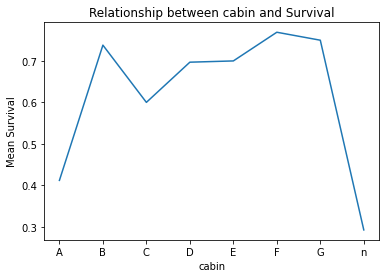

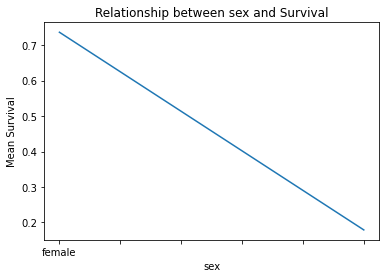

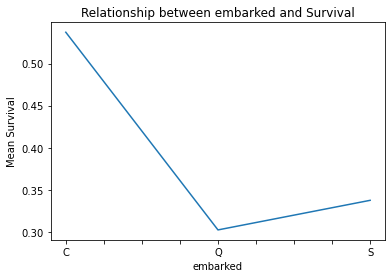

You can see that the relationship between the target and cabin and embarked goes up and down, depending on the category.

## Probability ratio encoding with pandas


### Advantages

- quick
- returns pandas dataframe

### Limitations of pandas:

- it does not preserve information from train data to propagate to test data

In [ ]:
# let's calculate the probability of survived = 1 per category

prob_df = X_train.groupby(['cabin'])['survived'].mean()

# and capture it into a dataframe
prob_df = pd.DataFrame(prob_df)
prob_df

In [ ]:
# and now the probability of survived = 0

prob_df['died'] = 1 - prob_df['survived']

prob_df

In [ ]:
#  and now the ratio

prob_df['ratio'] = prob_df['survived'] / prob_df['died']

prob_df

In [ ]:
# and now let's capture the ratio in a dictionary

ordered_labels = prob_df['ratio'].to_dict()

ordered_labels

In [ ]:
# now, we replace the labels with the ratios

X_train['cabin'] = X_train['cabin'].map(ordered_labels)
X_test['cabin'] = X_test['cabin'].map(ordered_labels)

In [ ]:
# let's explore the result

X_train['cabin'].head(10)

In [ ]:
# we can turn the previous commands into 2 functions


def find_category_mappings(df, variable, target):

    tmp = pd.DataFrame(df.groupby([variable])[target].mean())
    
    tmp['non-target'] = 1 - tmp[target]
    
    tmp['ratio'] = tmp[target] / tmp['non-target']

    return tmp['ratio'].to_dict()


def integer_encode(train, test, variable, ordinal_mapping):

    X_train[variable] = X_train[variable].map(ordinal_mapping)
    X_test[variable] = X_test[variable].map(ordinal_mapping)

In [ ]:
# and now we run a loop over the remaining categorical variables

for variable in ['sex', 'embarked']:
    
    mappings = find_category_mappings(X_train, variable, 'survived')
    
    integer_encode(X_train, X_test, variable, mappings)

In [ ]:
# let's see the result

X_train.head()

In [ ]:
# let's inspect the newly created monotonic relationship
# between the categorical variables and the target

for var in ['cabin', 'sex', 'embarked']:
    
    fig = plt.figure()
    fig = X_train.groupby([var])['survived'].mean().plot()
    fig.set_title('Monotonic relationship between {} and Survival'.format(var))
    fig.set_ylabel('Mean Survived')
    plt.show()

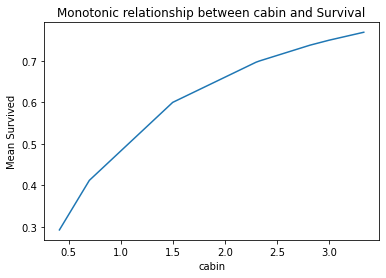

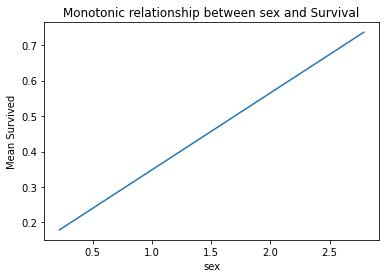

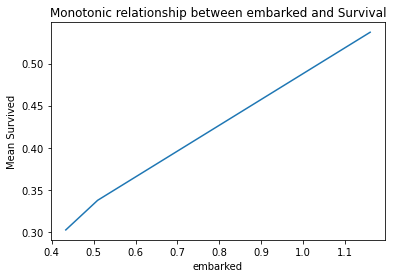

Note the monotonic relationships between the mean target and the categories.

Note
Replacing categorical labels with this code and method will generate missing values for categories present in the test set that were not seen in the training set. Therefore it is extremely important to handle rare labels before-hand. I will explain how to do this, in a later notebook.

In addition, it will create NA or Inf if the probability of target = 0 is zero, as the division by zero is not defined.

## Probability Ratio Encoding with Feature-Engine

If using Feature-Engine, instead of pandas, we do not need to keep the target variable in the training dataset.

In [ ]:
# let's separate into training and testing set

X_train, X_test, y_train, y_test = train_test_split(
    data[['cabin', 'sex', 'embarked']], # predictors
    data['survived'],  # target
    test_size=0.3,  # percentage of obs in test set
    random_state=0)  # seed to ensure reproducibility

X_train.shape, X_test.shape

In [ ]:
ratio_enc = WoERatioCategoricalEncoder(
    encoding_method = 'ratio',
    variables=['cabin', 'sex', 'embarked'])

In [ ]:
# when fitting the transformer, we need to pass the target as well
# just like with any Scikit-learn predictor class

ratio_enc.fit(X_train, y_train)

In [ ]:
# in the encoder dict we see the P(1)/P(0) for each
# category for each of the indicated variables

ratio_enc.encoder_dict_

In [ ]:
# this is the list of variables that the encoder will transform

ratio_enc.variables

In [ ]:
X_train = ratio_enc.transform(X_train)
X_test = ratio_enc.transform(X_test)

# let's explore the result
X_train.head()

**Note**

If the argument variables is left to None, then the encoder will automatically identify all categorical variables. Is that not sweet?

The encoder will not encode numerical variables. So if some of your numerical variables are in fact categories, you will need to re-cast them as object before using the encoder.

If there is a label in the test set that was not present in the train set, the encoder will through and error, to alert you of this behaviour.

Finally, if the probability of target = 0 is zero for any category, the encoder will raise an error as the division by zero is not defined.

## 1.7 Weight  of evidence<a class="anchor" id="probability"></a>

Weight of Evidence (WoE) was developed primarily for the credit and financial industries to help build more predictive models to evaluate the risk of loan default. That is, to predict how likely the money lent to a person or institution is to be lost. Thus, Weight of Evidence is a measure of the "strength” of a grouping technique to separate good and bad risk (default). 

- WoE will be 0 if the P(Goods) / P(Bads) = 1, that is, if the outcome is random for that group.
- If P(Bads) > P(Goods) the odds ratio will be < 1 and,
- WoE will be < 0 if,  P(Goods) > P(Bads).

WoE is well suited for Logistic Regression, because the Logit transformation is simply the log of the odds, i.e., ln(P(Goods)/P(Bads)). Therefore, by using WoE-coded predictors in logistic regression, the predictors are all prepared and coded to the same scale, and the parameters in the linear logistic regression equation can be directly compared.

The WoE transformation has three advantages:

- It creates a monotonic relationship between the target and the independent variables.
- It orders the categories on a "logistic" scale which is natural for logistic regression
- The transformed variables can then be compared because they are on the same scale. Therefore, it is possible to determine which one is more predictive.

The WoE also has a limitation:

- Prone to cause over-fitting


For more details follow this [article](https://www.listendata.com/2015/03/weight-of-evidence-woe-and-information.html#Steps-of-Calculating-WOE) and this [article](https://blogs.oracle.com/r/computing-weight-of-evidence-woe-and-information-value-iv).

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

# to split the datasets
from sklearn.model_selection import train_test_split

# for encoding using feature-engine
from feature_engine.categorical_encoders import WoERatioCategoricalEncoder
from category_encoders.woe import WOEEncoder

In [ ]:
# load dataset

data = pd.read_csv(
    '../titanic.csv',
    usecols=['cabin', 'sex', 'embarked', 'survived'])

data.head()

In [ ]:
# let's remove observations with na in embarked

data.dropna(subset=['embarked'], inplace=True)
data.shape

In [ ]:
# Now we extract the first letter of the cabin
# to create a simpler variable for the demo

data['cabin'] = data['cabin'].astype(str).str[0]

In [ ]:
# and we remove the observations where cabin = T
# because only few observations show T in the dataset

data = data[data['cabin']!= 'T']
data.shape

In [ ]:
# let's have a look at how many labels each variable has

for col in data.columns:
    print(col, ': ', len(data[col].unique()), ' labels')

In [ ]:
# let's explore the unique categories
data['cabin'].unique()

We select calculate the woe using the train set, and then use those mappings in the test set.

Note that in the pandas implementation, we need to keep the target in the training set

In [ ]:
# let's separate into training and testing set

X_train, X_test, y_train, y_test = train_test_split(
    data[['cabin', 'sex', 'embarked', 'survived']],  # this time we keep the target!!
    data['survived'],  # target
    test_size=0.3,  # percentage of obs in test set
    random_state=0)  # seed to ensure reproducibility

X_train.shape, X_test.shape

In [ ]:
# let's explore the relationship of the categories with the target

for var in ['cabin', 'sex', 'embarked']:
    
    fig = plt.figure()
    fig = X_train.groupby([var])['survived'].mean().plot()
    fig.set_title('Relationship between {} and Survival'.format(var))
    fig.set_ylabel('Mean Survival')
    plt.show()

You can see that the relationship between the target and cabin and embarked goes up and down, depending on the category.

## Weight of Evidence with pandas


### Advantages

- quick
- returns pandas dataframe

### Limitations of pandas:

- it does not preserve information from train data to propagate to test data

We need to store the mappings separately if planning to use the model in production.

In [ ]:
# let's calculate the proportion of passengers who survived
# over the total survivors, per category of cabin

# total survivors
total_survived = X_train['survived'].sum()

# percentage of passenges who survived, from total survivors
# per category of cabin
survived = X_train.groupby(['cabin'])['survived'].sum() / total_survived

survived

In [ ]:
# let's calculate the proportion of passengers who did not survive
# over the total passengers who didn't, per category of cabin

# total passengers who did not survive
total_non_survived = len(X_train) - X_train['survived'].sum()

# let's create a flag for passenges who did not survive
X_train['non_survived'] = np.where(X_train['survived'] == 1, 0, 1)

# now let's calculate the % of passengers who did not survive
# per category of cabin
non_survived = X_train.groupby(
    ['cabin'])['non_survived'].sum() / total_non_survived

non_survived

In [ ]:
#  now let's combine those 2 series in a dataframe and calculate the
# WoE

# let's concatenate the series in a dataframe
prob_df = pd.concat([survived, non_survived], axis=1)

# let's calculate the Weight of Evidence
prob_df['woe'] = np.log(prob_df['survived']/prob_df['non_survived'])

prob_df

In [ ]:
# and now let's capture the woe in a dictionary

ordered_labels = prob_df['woe'].to_dict()

ordered_labels

In [ ]:
# now, we replace the labels with the woe

X_train['cabin'] = X_train['cabin'].map(ordered_labels)
X_test['cabin'] = X_test['cabin'].map(ordered_labels)

In [ ]:
# let's explore the result

X_train['cabin'].head(10)

In [ ]:
# we can turn the previous commands into 2 functions


def find_category_mappings(df, variable, target):

    # copy of the original dataframe, so we do not accidentally
    # modify it
    tmp = df.copy()

    # total positive class
    total_pos = df[target].sum()

    # total negative class
    total_neg = len(df) - df[target].sum()

    # non target
    tmp['non-target'] = 1 - tmp[target]

    # % of positive class per category, respect to total positive class
    pos_perc = tmp.groupby([variable])[target].sum() / total_pos

    # % of negative class per category, respect to total negative class
    neg_perc = tmp.groupby([variable])['non-target'].sum() / total_neg

    # let's concatenate
    prob_tmp = pd.concat([pos_perc, neg_perc], axis=1)

    # let's calculate the Weight of Evidence
    prob_tmp['woe'] = np.log(prob_tmp[target]/prob_tmp['non-target'])

    return prob_tmp['woe'].to_dict()


def integer_encode(train, test, variable, ordinal_mapping):

    X_train[variable] = X_train[variable].map(ordinal_mapping)

    X_test[variable] = X_test[variable].map(ordinal_mapping)

In [ ]:
# and now we run a loop over the remaining categorical variables

for variable in ['sex', 'embarked']:

    mappings = find_category_mappings(X_train, variable, 'survived')

    integer_encode(X_train, X_test, variable, mappings)

In [ ]:
# let's see the result

X_train.head()

In [ ]:
# let's inspect the newly created monotonic relationship
# between the categorical variables and the target

# first in the train set
for var in ['cabin', 'sex', 'embarked']:

    fig = plt.figure()
    fig = X_train.groupby([var])['survived'].mean().plot()
    fig.set_title('Monotonic relationship between {} and Survival'.format(var))
    fig.set_ylabel('Mean Survived')
    plt.show()

Note: all the charts are straight lines

Note the monotonic relationships between the mean target and the categories. In the train set.

In [ ]:
# now in the test set
for var in ['cabin', 'sex', 'embarked']:
    
    fig = plt.figure()
    fig = X_test.groupby([var])['survived'].mean().plot()
    fig.set_title('Monotonic relationship between {} and Survival'.format(var))
    fig.set_ylabel('Mean Survived')
    plt.show()

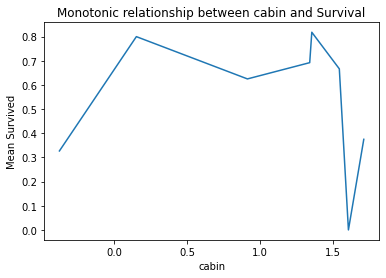

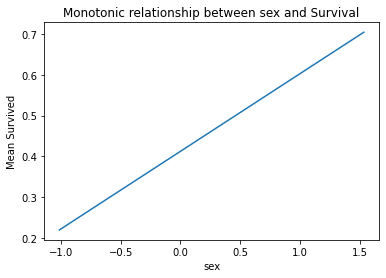

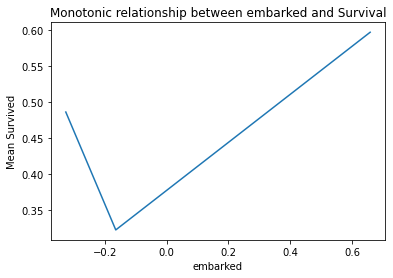

The monotonic relationship does not hold when encoding the categorical variables in the test set. This could mean that the categories are not informative of the target or the proportion of survivors is not homogeneous between in the categories in the train and test sets. 

In situations like this, we could try grouping rare labels into a joint category as we will cover later in this section, before applying the Weight of evidence transformation.

### Note

Replacing categorical labels with this code and method will generate missing values for categories present in the test set that were not seen in the training set. Therefore it is extremely important to handle rare labels before-hand. I will explain how to do this, in a later notebook.

**In addition, it will create NA or Inf if any of the 2 terms in the ratio of the WoE formula are 0**

## Weight of Evidence with Feature-Engine

If using Feature-Engine, instead of pandas, we do not need to keep the target variable in the training dataset.

In [ ]:
# let's separate into training and testing set

X_train, X_test, y_train, y_test = train_test_split(
    data[['cabin', 'sex', 'embarked']],  # predictors
    data['survived'],  # target
    test_size=0.3,  # percentage of obs in test set
    random_state=0)  # seed to ensure reproducibility

X_train.shape, X_test.shape

In [ ]:
woe_enc = WoERatioCategoricalEncoder(
    encoding_method = 'woe',
    variables=['cabin', 'sex', 'embarked'])

In [ ]:
# when fitting the transformer, we need to pass the target as well
# just like with any Scikit-learn predictor class

woe_enc.fit(X_train, y_train)

In [ ]:
# in the encoder dict we see the woe for each category
# for each of the selected variables

woe_enc.encoder_dict_

In [ ]:
# this is the list of variables that the encoder will transform

woe_enc.variables

In [ ]:
X_train = woe_enc.transform(X_train)
X_test = woe_enc.transform(X_test)

# let's explore the result
X_train.head()

**Note**

If the argument variables is left to None, then the encoder will automatically identify all categorical variables. Is that not sweet?

The encoder will not encode numerical variables. So if some of your numerical variables are in fact categories, you will need to re-cast them as object before using the encoder.

If there is a label in the test set that was not present in the train set, the encoder will through and error, to alert you of this behaviour.

Finally, if any of the terms in the weight of evidence calculation is 0, the log of 0 is not defined, so this transformer will raise an error.